<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Week%206/C6_Autoencoder_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import make_blobs

# Import and Explore Data

In [0]:
data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

In [4]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

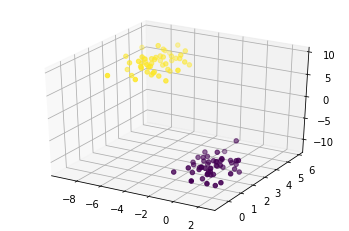

In [5]:
from mpl_toolkits.mplot3d import Axes3D

features = data[0]

data_x = features[:,0]
data_y = features[:,1]
data_z = features[:,2]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

# Define Simple Linear Autoencoder

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [7]:
model = Sequential()

model.add(Dense(3, activation="linear", input_shape=(3,)))
model.add(Dense(2, activation="linear", name='compressed'))
model.add(Dense(3, activation="linear"))

model.compile('adam', 'mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
compressed (Dense)           (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(features, features, epochs=10, batch_size=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 1s 6ms/sample - loss: 74.6809
Epoch 2/10
100/100 [==============================] - 0s 185us/sample - loss: 69.2267
Epoch 3/10
100/100 [==============================] - 0s 174us/sample - loss: 64.3986
Epoch 4/10
100/100 [==============================] - 0s 172us/sample - loss: 60.3594
Epoch 5/10
100/100 [==============================] - 0s 167us/sample - loss: 57.0984
Epoch 6/10
100/100 [==============================] - 0s 174us/sample - loss: 54.1285
Epoch 7/10
100/100 [==============================] - 0s 162us/sample - loss: 51.6691
Epoch 8/10
100/100 [==============================] - 0s 179us/sample - loss: 49.5269
Epoch 9/10
100/100 [==============================] - 0s 304us/sample - loss: 47.6852
Epoch 10/10
100/100 [==============================] - 0s 165us/sample - loss: 45.9438


# Plot Regular Output

In [0]:
outputs_reg = model.predict(features)

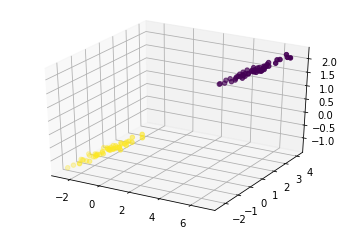

In [11]:
data_x = outputs_reg[:,0]
data_y = outputs_reg[:,1]
data_z = outputs_reg[:,2]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

# Plot Compressed Output

In [0]:
model_compressed_output = Model(inputs=model.inputs, 
                                outputs=model.get_layer('compressed').output)

In [0]:
out_compressed = model_compressed_output.predict(features)

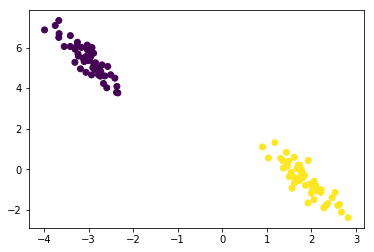

In [14]:
plt.scatter(out_compressed[:,0], out_compressed[:,1], c=data[1])

In [15]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 0.0578315 , -0.59220356, -0.32147467],
       [ 0.37619942,  0.49956885, -0.17354643],
       [-0.8010382 , -0.2644793 ,  0.19885522]], dtype=float32)